3. Which player has the highest number of wins? 


In [1]:
import pandas as pd
from pathlib import Path

project_root = Path.cwd().parent
raw_dir = project_root / "data" / "raw"
out_dir = project_root / "reports" / "answers"
out_dir.mkdir(parents=True, exist_ok=True)

df = pd.read_parquet(raw_dir / "match_results_player.parquet")

df["won"] = ((df["side"] == "home") & (df["winner_code"] == 1)) | \
            ((df["side"] == "away") & (df["winner_code"] == 2))
df["won"] = df["won"].astype("boolean")

wins = (
    df[df["won"]]
    .groupby(["player_id", "full_name"], as_index=False)
    .size()
    .rename(columns={"size": "wins"})
    .sort_values("wins", ascending=False)
    .reset_index(drop=True)
)

top_player = wins.iloc[0]
output_path = out_dir / "q3_top_wins.csv"
wins.to_csv(output_path, index=False, encoding="utf-8-sig")

print(f"Top 10 players by total wins:\n{wins.head(10)}")
print(f"\nPlayer with the most wins: {top_player['full_name']} ({top_player['wins']} wins)")
print(f"Saved to {output_path}")


Top 10 players by total wins:
   player_id                          full_name  wins
0    50901.0                      Popko, Dmitry    29
1   231620.0                   Chidekh, Clement    22
2   202572.0                      Gengel, Marek    21
3   230049.0              Jianu, Filip Cristian    21
4    82133.0  Dellien Velasco, Murkel Alejandro    20
5   205282.0                  Kužmová, Katarína    19
6    58369.0                         Bolt, Alex    19
7   238867.0              Ovcharenko, Oleksandr    19
8   100093.0                 Ferrari, Francesco    18
9   186885.0                        Hardt, Nick    18

Player with the most wins: Popko, Dmitry (29 wins)
Saved to c:\Users\mit\Desktop\Finaaal\reports\answers\q3_top_wins.csv


اقداماتی برای پر کردن سلول های خالی صورت گرفت اما تاثیر چندانی در نتیجه نداشت و با اینحال دقت تحلیل را تا حدی کاهش میداد درنتیجه سلول های خالی را پر نکردم و کنار گذاشتم

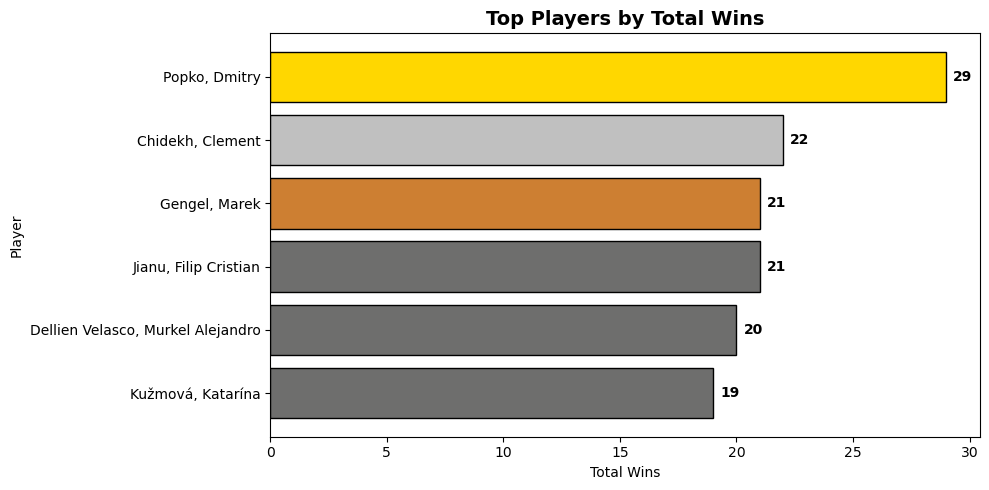

Chart saved to: c:\Users\mit\Desktop\Final_Project\reports\figures\top10_total_wins.png


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

project_root = Path.cwd().parent
figures_dir = project_root / "reports" / "figures"
figures_dir.mkdir(parents=True, exist_ok=True)

data = pd.DataFrame({
    "player_id": [50901.0, 231620.0, 202572.0, 230049.0, 82133.0, 205282.0],
    "full_name": [
        "Popko, Dmitry",
        "Chidekh, Clement",
        "Gengel, Marek",
        "Jianu, Filip Cristian",
        "Dellien Velasco, Murkel Alejandro",
        "Kužmová, Katarína"
    ],
    "wins": [29, 22, 21, 21, 20, 19]
})

data_sorted = data.sort_values("wins", ascending=True)


colors = ["#6E6E6D"] * len(data_sorted)
colors[-1] = "#FFD700"
colors[-2] = "#C0C0C0"
colors[-3] = "#CD7F32"

plt.figure(figsize=(10, 5))
bars = plt.barh(
    data_sorted["full_name"],
    data_sorted["wins"],
    color=colors,
    edgecolor="black"
)

for bar in bars:
    plt.text(
        bar.get_width() + 0.3,
        bar.get_y() + bar.get_height() / 2,
        f"{int(bar.get_width())}",
        va="center",
        fontsize=10,
        fontweight="bold"
    )


plt.title("Top Players by Total Wins", fontsize=14, fontweight="bold")
plt.xlabel("Total Wins")
plt.ylabel("Player")
plt.tight_layout()

fig_path = figures_dir / "top10_total_wins.png"
plt.savefig(fig_path, dpi=300)
plt.show()
plt.close()

print(f"Chart saved to: {fig_path}")
